# Molecular fingerprint based QSAR Analysis for SARS coronavirus 3C-like protease inhibitors

**Quantitative Structure-Activity Relationship** (QSAR) is a computational method used to analyze the relationship between the three-dimensional structure of molecules and their biological activity.


**Molecular fingerprints** encode properties of small molecules and assess their similarities computationally through bit string comparisons.

## Installing Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#conda
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-06-12 02:04:49--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   211MB/s    in 0.4s    

2023-06-12 02:04:49 (211 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [3]:
#rdkit
! pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 237 kB/s 
     |████████████████████████████████| 3.3 MB 47.3 MB/s 
     |████████████████████████████████| 15.7 MB 45.6 MB/s 


In [4]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [5]:
! pip install padelpy
from padelpy import padeldescriptor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 162 kB/s 


In [6]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [7]:
import glob

In [8]:
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing

### Target Proteins 

**CHEMBL5118** and **CHEMBL3927** targets were extracted from the ChEMBL database. 

*   CHEMBL5118: Replicase polyprotein 1ab
*   CHEMBL3927: SARS coronavirus 3C-like proteinase



### Dataset Extraction

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [10]:
input = '/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL5118.csv'
output = '/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL5118_clean.csv'

with open(input, 'r') as file_in, open(output, 'w') as file_out:
  for line in file_in:
    updated_line = line.replace('"', '')  # Remove double quotes from the line
    updated_line = line.replace(';', ',')
    file_out.write(updated_line)

print("Quotes and ; removed successfully.")

Quotes and ; removed successfully.


In [11]:
data1 = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL5118_clean.csv') 
data1

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3809861,NaN,None,434.45,1,5.48,3k,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
1,CHEMBL3808427,NaN,None,525.00,2,7.43,3i,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
2,CHEMBL238216,NaN,None,581.67,1,1.60,6,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1137503,1,Scientific Literature,Bioorg Med Chem Lett,2007,None,NaN
3,CHEMBL4214471,NaN,None,564.71,1,1.37,9d,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL4196085,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
4,CHEMBL492769,NaN,None,332.74,0,3.63,2,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,IC50,'>',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1153308,1,Scientific Literature,Bioorg Med Chem Lett,2009,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,CHEMBL3809579,NaN,None,490.56,1,6.78,3p,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
211,CHEMBL4203883,NaN,None,690.79,1,2.36,10c,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(C(=O)OC(C)...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL4196085,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
212,CHEMBL151,LUTEOLIN,2.0,286.24,0,2.28,Luteolin,O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1275337,1,Scientific Literature,Bioorg Med Chem,2010,None,NaN
213,CHEMBL3099536,NaN,None,419.89,0,1.98,7d,O=C1Nc2ccc(S(=O)(=O)N3CCN(Cc4cccc(Cl)c4)CC3)cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3098093,1,Scientific Literature,Bioorg Med Chem,2014,None,NaN


In [12]:
input = '/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL3927.csv'
output = '/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL3927_clean.csv'

with open(input, 'r') as file_in, open(output, 'w') as file_out:
  for line in file_in:
    updated_line = line.replace('"', '')  # Remove double quotes from the line
    updated_line = line.replace(';', ',')
    file_out.write(updated_line)

print("Quotes and ; removed successfully.")

Quotes and ; removed successfully.


In [13]:
data2 = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Dataset/ChEMBL3927_clean.csv') 
data2

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL212454,NaN,None,565.04,2,6.10,4,O=C(Oc1ccc(S(=O)(=O)c2ccc(OC(=O)C(Cl)=C(Cl)Cl)...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1145342,1,Scientific Literature,J Med Chem,2006,None,NaN
1,CHEMBL212190,NaN,None,365.48,0,4.14,17,Cc1oc(C(C)(C)C)cc1-c1cc(NS(=O)(=O)c2cccs2)[nH]n1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1145342,1,Scientific Literature,J Med Chem,2006,None,NaN
2,CHEMBL207484,NaN,None,403.38,0,3.22,18,COC(OC)c1cc(O)nc(SCC(=O)Nc2ccc(C(F)(F)F)cc2)n1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
3,CHEMBL210511,NaN,None,401.88,0,4.67,16,Cc1cc(O)nc(SCC(=O)Nc2ccc(Oc3ccc(Cl)cc3)cc2)n1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
4,CHEMBL212504,NaN,None,317.33,0,2.31,7,Cc1nc(S(=O)(=O)c2ccccc2)c(C#N)c(C)c1[N+](=O)[O-],IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1145342,1,Scientific Literature,J Med Chem,2006,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL210092,NaN,None,519.14,2,7.05,3,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
129,CHEMBL210437,NaN,None,393.51,1,5.01,26,COc1ccc(-c2ccnc(SCC(=O)Nc3ccc(C(C)C)cc3)n2)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
130,CHEMBL209227,NaN,None,460.01,1,5.42,5,Cc1nc(-c2nc(-c3ccnc(SCC(=O)Nc4ccc(Cl)cc4)n3)cs...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
131,CHEMBL210145,NaN,None,357.44,0,2.92,22,CCOc1ccc(N2C(=O)CC(Sc3nc(C)cc(C)n3)C2=O)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN


In [14]:
df = pd.concat([data1, data2], ignore_index=True) #merging two dataset
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3809861,NaN,None,434.45,1,5.48,3k,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
1,CHEMBL3808427,NaN,None,525.00,2,7.43,3i,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
2,CHEMBL238216,NaN,None,581.67,1,1.60,6,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1137503,1,Scientific Literature,Bioorg Med Chem Lett,2007,None,NaN
3,CHEMBL4214471,NaN,None,564.71,1,1.37,9d,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL4196085,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
4,CHEMBL492769,NaN,None,332.74,0,3.63,2,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,IC50,'>',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1153308,1,Scientific Literature,Bioorg Med Chem Lett,2009,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,CHEMBL210092,NaN,None,519.14,2,7.05,3,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
344,CHEMBL210437,NaN,None,393.51,1,5.01,26,COc1ccc(-c2ccnc(SCC(=O)Nc3ccc(C(C)C)cc3)n2)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
345,CHEMBL209227,NaN,None,460.01,1,5.42,5,Cc1nc(-c2nc(-c3ccnc(SCC(=O)Nc4ccc(Cl)cc4)n3)cs...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
346,CHEMBL210145,NaN,None,357.44,0,2.92,22,CCOc1ccc(N2C(=O)CC(Sc3nc(C)cc(C)n3)C2=O)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN


### Handling missing and duplicate data

In [15]:
df = df[df['Standard Value'].notna()]
df = df[df['Smiles'].notna()]
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3809861,NaN,None,434.45,1,5.48,3k,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
1,CHEMBL3808427,NaN,None,525.00,2,7.43,3i,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
2,CHEMBL238216,NaN,None,581.67,1,1.60,6,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1137503,1,Scientific Literature,Bioorg Med Chem Lett,2007,None,NaN
3,CHEMBL4214471,NaN,None,564.71,1,1.37,9d,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL4196085,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
4,CHEMBL492769,NaN,None,332.74,0,3.63,2,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,IC50,'>',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1153308,1,Scientific Literature,Bioorg Med Chem Lett,2009,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,CHEMBL210092,NaN,None,519.14,2,7.05,3,CSc1sc(-c2nc(C)cs2)c(C)c1-c1ccnc(SCC(=O)Nc2ccc...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
344,CHEMBL210437,NaN,None,393.51,1,5.01,26,COc1ccc(-c2ccnc(SCC(=O)Nc3ccc(C(C)C)cc3)n2)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
345,CHEMBL209227,NaN,None,460.01,1,5.42,5,Cc1nc(-c2nc(-c3ccnc(SCC(=O)Nc4ccc(Cl)cc4)n3)cs...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN
346,CHEMBL210145,NaN,None,357.44,0,2.92,22,CCOc1ccc(N2C(=O)CC(Sc3nc(C)cc(C)n3)C2=O)cc1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1148632,1,Scientific Literature,J Med Chem,2006,None,NaN


In [16]:
len(df['Smiles'].unique())

254

In [17]:
#dropping duplicates

df = df.drop_duplicates(['Smiles'])
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3809861,NaN,None,434.45,1,5.48,3k,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
1,CHEMBL3808427,NaN,None,525.00,2,7.43,3i,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL3808339,1,Scientific Literature,Bioorg Med Chem,2016,None,NaN
2,CHEMBL238216,NaN,None,581.67,1,1.60,6,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1137503,1,Scientific Literature,Bioorg Med Chem Lett,2007,None,NaN
3,CHEMBL4214471,NaN,None,564.71,1,1.37,9d,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,IC50,'=',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL4196085,1,Scientific Literature,Eur J Med Chem,2018,None,NaN
4,CHEMBL492769,NaN,None,332.74,0,3.63,2,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,IC50,'>',...,Replicase polyprotein 1ab,SARS coronavirus,SINGLE PROTEIN,CHEMBL1153308,1,Scientific Literature,Bioorg Med Chem Lett,2009,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,CHEMBL187579,NaN,None,281.27,0,1.89,4b,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1139624,1,Scientific Literature,Bioorg Med Chem Lett,2005,None,NaN
335,CHEMBL215397,NaN,None,308.27,0,2.34,13,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1145342,1,Scientific Literature,J Med Chem,2006,None,NaN
338,CHEMBL222769,NaN,None,334.16,0,4.87,52,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1144475,1,Scientific Literature,J Med Chem,2007,None,NaN
340,CHEMBL222628,NaN,None,240.67,0,2.41,50,O=C(Oc1cncc(Cl)c1)c1cscn1,IC50,'=',...,SARS coronavirus 3C-like proteinase,SARS coronavirus,SINGLE PROTEIN,CHEMBL1144475,1,Scientific Literature,J Med Chem,2007,None,NaN


### Labeling compounds

IC50 - It indicates how much drug is needed to inhibit a biological process by half.

Here, 
* IC50 less than 1000 nM - active 
* IC50 greater than 10,000 nM - inactive
* Rest - intermediate

In [18]:
bioactivity_class = []
for i in df['Standard Value']:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

Iterating necessary data to lists and creating new dataframe

In [19]:
mol_cid = []
for i in df['Molecule ChEMBL ID']:
  mol_cid.append(i)


standard_value = []
for i in df['Standard Value']:
  standard_value.append(i)

canonical_smiles = []
for i in df['Smiles']:
  canonical_smiles.append(i)

data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df_combined = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL3809861,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,intermediate,6400.0
1,CHEMBL3808427,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,intermediate,5800.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,300000.0
3,CHEMBL4214471,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,3900.0
4,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,50000.0
...,...,...,...,...
249,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
250,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,25000.0
251,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,63.0
252,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,270.0


In [20]:
df_combined.dtypes

molecule_chembl_id     object
canonical_smiles       object
bioactivity_class      object
standard_value        float64
dtype: object

### Export

In [21]:
df_combined.to_csv('covid_df_four_properties.csv', index=False)

In [22]:
cp covid_df_four_properties.csv '/content/gdrive/MyDrive/CSE498R/Results/' 

## Exploratory Data Analysis and Chemical Space Analysis via Lipinski descriptors

In [23]:
df = df_combined

### not needed now

In [24]:
#following commeneted ones can be used to split smiles 

In [25]:
#df_no_smiles = df.drop(columns='canonical_smiles') 


In [26]:
'''smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')'''

"smiles = []\n\nfor i in df.canonical_smiles.tolist():\n  cpd = str(i).split('.')\n  cpd_longest = max(cpd, key = len)\n  smiles.append(cpd_longest)\n\nsmiles = pd.Series(smiles, name = 'canonical_smiles')"

In [27]:
'''df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles'''

'df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)\ndf_clean_smiles'

### Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [28]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [29]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,434.451,5.47930,1.0,4.0
1,525.004,7.43020,1.0,4.0
2,581.670,1.59522,4.0,8.0
3,564.705,1.37410,3.0,7.0
4,332.739,3.62820,2.0,4.0
...,...,...,...,...
249,281.271,1.89262,0.0,5.0
250,308.271,2.33580,0.0,6.0
251,334.158,4.86760,0.0,4.0
252,240.671,2.41070,0.0,5.0


In [30]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3809861,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,intermediate,6400.0,434.451,5.47930,1.0,4.0
1,CHEMBL3808427,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,intermediate,5800.0,525.004,7.43020,1.0,4.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,300000.0,581.670,1.59522,4.0,8.0
3,CHEMBL4214471,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,3900.0,564.705,1.37410,3.0,7.0
4,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,50000.0,332.739,3.62820,2.0,4.0
...,...,...,...,...,...,...,...,...
249,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
250,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,25000.0,308.271,2.33580,0.0,6.0
251,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,63.0,334.158,4.86760,0.0,4.0
252,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,270.0,240.671,2.41070,0.0,5.0


### IC50 to pIC50

pIC50 [ - log10(IC50)] has more uniform distribution than IC50.

<Axes: >

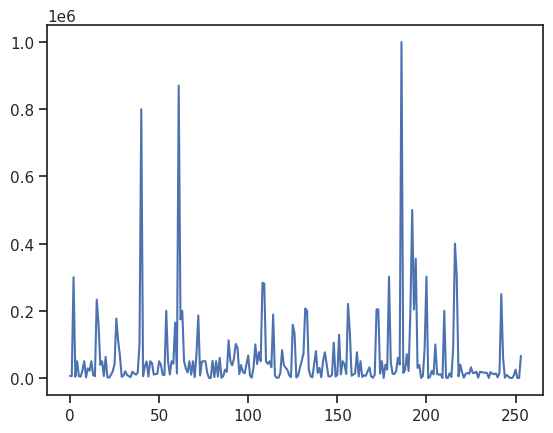

In [31]:
df_combined['standard_value'].plot()

Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [32]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
    return x
        

In [33]:
df_final = pIC50(df_combined)

<ipython-input-32-fae4f7ceef51>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [34]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3809861,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,intermediate,434.451,5.47930,1.0,4.0,5.193820
1,CHEMBL3808427,CC(C)(C)c1ccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4cc...,intermediate,525.004,7.43020,1.0,4.0,5.236572
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL4214471,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,564.705,1.37410,3.0,7.0,5.408935
4,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,332.739,3.62820,2.0,4.0,4.301030
...,...,...,...,...,...,...,...,...
249,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
250,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,308.271,2.33580,0.0,6.0,4.602060
251,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,334.158,4.86760,0.0,4.0,7.200659
252,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,240.671,2.41070,0.0,5.0,6.568636


<Axes: >

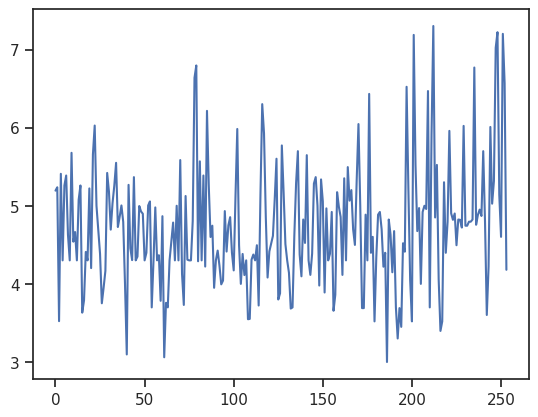

In [35]:
df_final['pIC50'].plot()

In [36]:
df_final.pIC50.describe()

count    254.000000
mean       4.730414
std        0.785773
min        3.000000
25%        4.301030
50%        4.696809
75%        5.124939
max        7.301030
Name: pIC50, dtype: float64

### Removing the 'intermediate' bioactivity class

In [37]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
4,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,332.739,3.62820,2.0,4.0,4.301030
7,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,368.385,3.85260,3.0,6.0,4.628932
8,CHEMBL492571,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1,inactive,297.310,3.00790,3.0,4.0,4.301030
10,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608
...,...,...,...,...,...,...,...,...
248,CHEMBL222840,O=C(Oc1cncc(Cl)c1)c1ccco1,active,223.615,2.54720,0.0,4.0,7.221849
250,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,308.271,2.33580,0.0,6.0,4.602060
251,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,334.158,4.86760,0.0,4.0,7.200659
252,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,240.671,2.41070,0.0,5.0,6.568636


In [38]:
df_2class = df_2class.reset_index(drop=True)
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
1,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,332.739,3.62820,2.0,4.0,4.301030
2,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,368.385,3.85260,3.0,6.0,4.628932
3,CHEMBL492571,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1,inactive,297.310,3.00790,3.0,4.0,4.301030
4,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608
...,...,...,...,...,...,...,...,...
193,CHEMBL222840,O=C(Oc1cncc(Cl)c1)c1ccco1,active,223.615,2.54720,0.0,4.0,7.221849
194,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,308.271,2.33580,0.0,6.0,4.602060
195,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,334.158,4.86760,0.0,4.0,7.200659
196,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,240.671,2.41070,0.0,5.0,6.568636


### Export

In [39]:
df_2class.to_csv('covid_df_2_classes.csv', index=False)

In [40]:
cp covid_df_2_classes.csv '/content/gdrive/MyDrive/CSE498R/Results/' 

### Chemical Space Analysis and Statistical analysis using Mann-Whitney U Test

The Mann-Whitney U test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [41]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

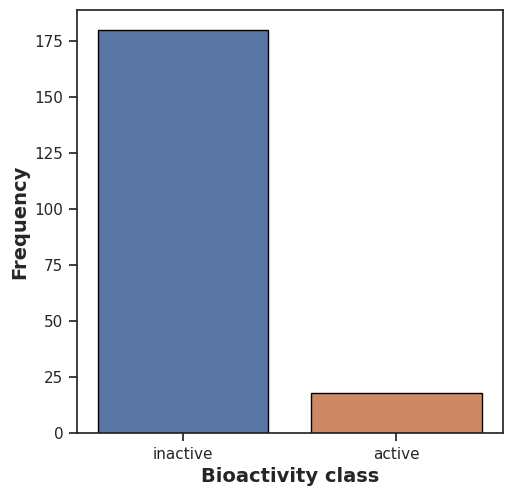

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

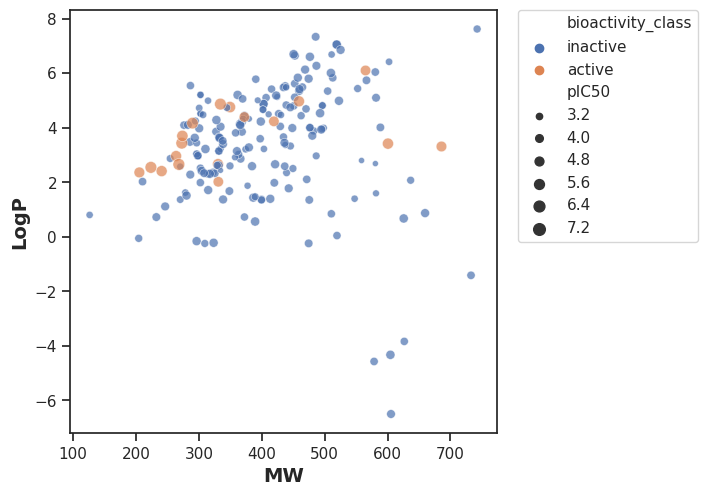

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

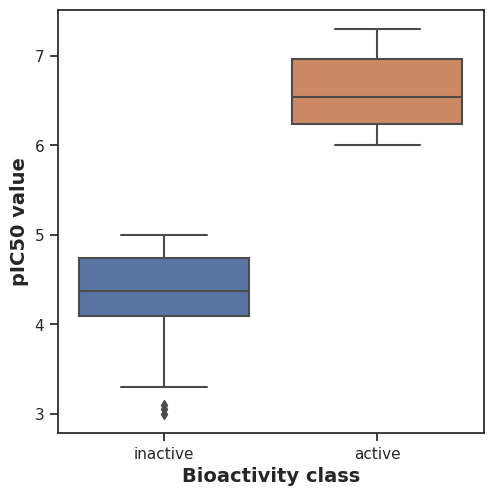

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

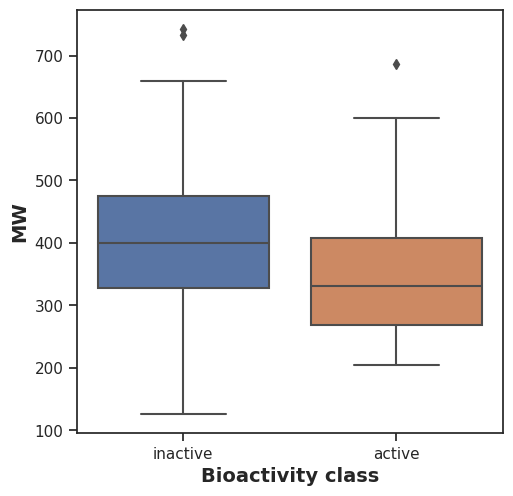

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [46]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1077.0,0.019262,0.05,Different distribution (reject H0)


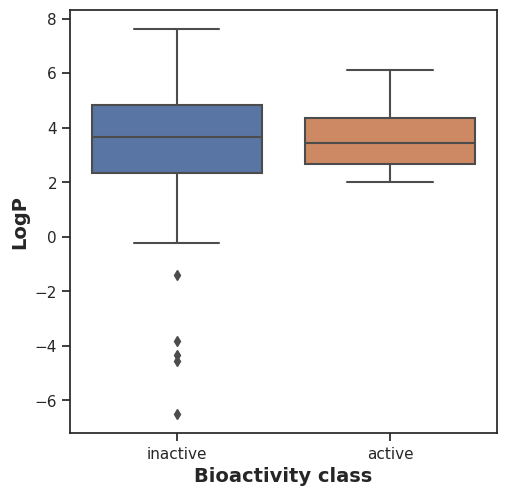

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [48]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1606.0,0.953557,0.05,Same distribution (fail to reject H0)


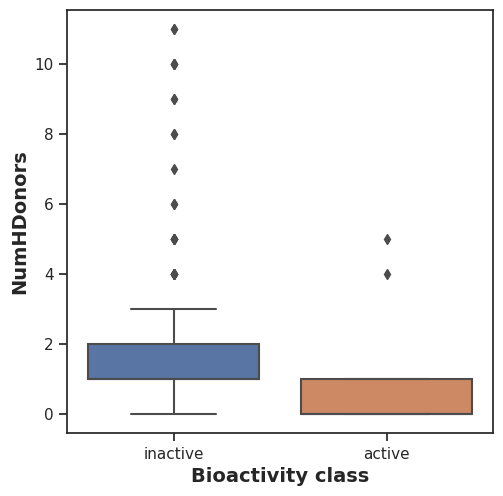

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [50]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,782.0,0.000198,0.05,Different distribution (reject H0)


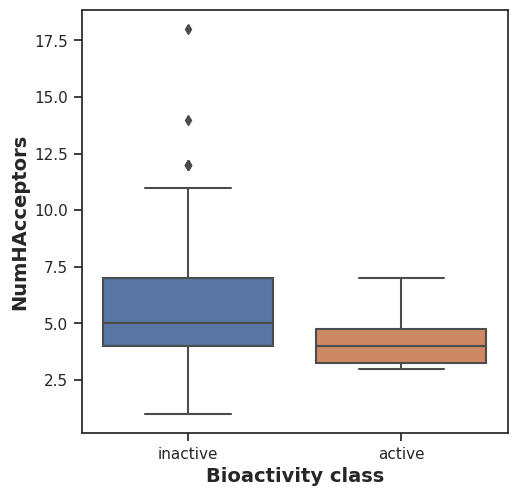

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [52]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1099.0,0.023147,0.05,Different distribution (reject H0)


### Export

In [53]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: gdrive/MyDrive/Classroom/Study Session https:  meet.google.com uwd-abfa-cpa
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW.pdf (deflated 38%)
  adding: covid_df_2_classes.csv (deflated 72%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: covid_df_four_properties.csv (deflated 77%)


In [54]:
cp results.zip '/content/gdrive/MyDrive/CSE498R/Results/' 

## SMILE Augmentation

In [55]:
df = df_2class
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
1,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,332.739,3.62820,2.0,4.0,4.301030
2,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,368.385,3.85260,3.0,6.0,4.628932
3,CHEMBL492571,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1,inactive,297.310,3.00790,3.0,4.0,4.301030
4,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608
...,...,...,...,...,...,...,...,...
193,CHEMBL222840,O=C(Oc1cncc(Cl)c1)c1ccco1,active,223.615,2.54720,0.0,4.0,7.221849
194,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,308.271,2.33580,0.0,6.0,4.602060
195,CHEMBL222769,O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1,active,334.158,4.86760,0.0,4.0,7.200659
196,CHEMBL222628,O=C(Oc1cncc(Cl)c1)c1cscn1,active,240.671,2.41070,0.0,5.0,6.568636


In [56]:
df['canonical_smiles'][0]

'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C'

In [57]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase

In [58]:
df['bioactivity_class'][196]

'active'

In [59]:
condition = df['bioactivity_class'] == 'inactive'

inactive_smiles = df[condition]
active_smiles = df[~condition]

In [60]:
inactive_smiles = inactive_smiles.reset_index(drop=True)
inactive_smiles

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
1,CHEMBL492769,O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1,inactive,332.739,3.62820,2.0,4.0,4.301030
2,CHEMBL116438,COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...,inactive,368.385,3.85260,3.0,6.0,4.628932
3,CHEMBL492571,O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1,inactive,297.310,3.00790,3.0,4.0,4.301030
4,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608
...,...,...,...,...,...,...,...,...
175,CHEMBL215732,CCOC(=O)/C(C#N)=C/Nc1ccc(S(=O)(=O)c2ccc(/N=C/C...,inactive,494.529,3.93386,2.0,10.0,4.795880
176,CHEMBL207458,CCOC(=O)c1cnc(SCC(=O)Nc2ccc([N+](=O)[O-])cc2)nc1N,inactive,377.382,1.87450,2.0,9.0,3.602060
177,CHEMBL210487,CCC(Sc1nc(O)c(C#N)c(-c2cccc(OC)c2)n1)C(=O)Nc1c...,inactive,462.531,4.44148,2.0,8.0,4.221849
178,CHEMBL215397,O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...,inactive,308.271,2.33580,0.0,6.0,4.602060


In [61]:
active_smiles = active_smiles.reset_index(drop=True)
active_smiles

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1876821,CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cccc(Cl)c1,active,330.837,2.01930,1.0,3.0,6.026872
1,CHEMBL2441741,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...,active,600.716,3.41810,4.0,6.0,6.638272
2,CHEMBL3105073,S=C(NCc1cccnc1)SCc1cc(Cl)sc1Cl,active,349.333,4.75780,1.0,4.0,6.795880
3,CHEMBL2441745,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...,active,685.822,3.31290,5.0,7.0,6.214670
4,CHEMBL221366,O=C(Oc1cccnc1)c1cccs1,active,205.238,2.36230,0.0,4.0,6.301030
5,CHEMBL212454,O=C(Oc1ccc(S(=O)(=O)c2ccc(OC(=O)C(Cl)=C(Cl)Cl)...,active,565.041,6.10120,0.0,6.0,6.045757
6,CHEMBL358279,NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1,active,330.343,2.66820,1.0,3.0,6.431798
7,CHEMBL212218,Cc1cc(S(=O)(=O)c2c([N+](=O)[O-])cc(C(F)(F)F)cc...,active,459.185,4.96982,0.0,6.0,6.522879
8,CHEMBL225515,O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1,active,272.691,3.43550,1.0,3.0,7.187087
9,CHEMBL222735,COc1cccc(C(=O)Oc2cncc(Cl)c2)c1,active,263.680,2.96280,0.0,4.0,6.468521


In [62]:
df_smiles_inactive = inactive_smiles['canonical_smiles']
df_smiles_inactive

0      CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
1            O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1
2      COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)c...
3                O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1
4      CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...
                             ...                        
175    CCOC(=O)/C(C#N)=C/Nc1ccc(S(=O)(=O)c2ccc(/N=C/C...
176    CCOC(=O)c1cnc(SCC(=O)Nc2ccc([N+](=O)[O-])cc2)nc1N
177    CCC(Sc1nc(O)c(C#N)c(-c2cccc(OC)c2)n1)C(=O)Nc1c...
178    O=[N+]([O-])c1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])...
179                         CCCCN1C(=O)C(=O)c2cc(I)ccc21
Name: canonical_smiles, Length: 180, dtype: object

In [63]:
df_smiles_active = active_smiles['canonical_smiles']
df_smiles_active

0               CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cccc(Cl)c1
1     CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...
2                        S=C(NCc1cccnc1)SCc1cc(Cl)sc1Cl
3     CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...
4                                 O=C(Oc1cccnc1)c1cccs1
5     O=C(Oc1ccc(S(=O)(=O)c2ccc(OC(=O)C(Cl)=C(Cl)Cl)...
6          NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1
7     Cc1cc(S(=O)(=O)c2c([N+](=O)[O-])cc(C(F)(F)F)cc...
8                    O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1
9                        COc1cccc(C(=O)Oc2cncc(Cl)c2)c1
10                            O=C(Oc1cncc(Br)c1)c1ccco1
11               O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21
12                      O=C(Oc1cncc(Cl)c1)c1cc2ccccc2o1
13              O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21
14                      O=C(Oc1cncc(Cl)c1)c1cc2ccccc2s1
15                            O=C(Oc1cncc(Cl)c1)c1ccco1
16             O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1
17                            O=C(Oc1cncc(Cl)c1)

In [64]:
smiles_list_inactive = df_smiles_inactive.tolist()
smiles_list_active = df_smiles_active.tolist()

In [65]:
smiles_list_inactive

['CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C',
 'O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1',
 'COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)ccc1O',
 'O=C(O)/C(O)=C/C(=O)c1cccc(NCc2ccccc2)c1',
 'CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N[C@H](C=O)C[C@@H]1CCNC1=O',
 'Cc1c(O)c(O)cc2c1CC=C1[C@@]2(C)CC[C@@]2(C)[C@@H]3C[C@](C)(C(=O)O)CC[C@]3(C)CC[C@]12C',
 'O=C(O)/C(O)=C/C(=O)c1ccccc1OCc1ccc(Cl)cc1',
 'CC(C)c1cc2c(cc1O)[C@@]1(C)CC[C@H](O)C(C)(C)[C@@H]1CC2',
 'CC(C)c1cc2c(cc1O)[C@@]1(C)CCC[C@@](C)(C=O)[C@@H]1CC2',
 'CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)OCc1ccccc1)[C@@H](C)O)C(C)C)C(=O)N[C@H](C#N)CCC(N)=O',
 'O=C(O)/C(O)=C/C(=O)c1ccccc1OCc1ccccc1',
 'COc1cc(C2C(C(=O)c3ccc(OCC(C)C)cc3C)=C(O)C(=O)N2CCN(C)C)ccc1O',
 'CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)OC(C)(C)C)C(C)C',
 'CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C@H](C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](

In [66]:
smiles_list_active

['CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cccc(Cl)c1',
 'CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)OCc1ccccc1)C(=O)N[C@H](C=O)C[C@@H]1CCNC1=O',
 'S=C(NCc1cccnc1)SCc1cc(Cl)sc1Cl',
 'CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)OCc1ccccc1)C(=O)N[C@@H](C[C@@H]1CCNC1=O)C(=O)C(=O)NC(C)C',
 'O=C(Oc1cccnc1)c1cccs1',
 'O=C(Oc1ccc(S(=O)(=O)c2ccc(OC(=O)C(Cl)=C(Cl)Cl)cc2)cc1)C(Cl)=C(Cl)Cl',
 'NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1',
 'Cc1cc(S(=O)(=O)c2c([N+](=O)[O-])cc(C(F)(F)F)cc2[N+](=O)[O-])c(Cl)cc1Cl',
 'O=C(Oc1cncc(Cl)c1)c1cc2ccccc2[nH]1',
 'COc1cccc(C(=O)Oc2cncc(Cl)c2)c1',
 'O=C(Oc1cncc(Br)c1)c1ccco1',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C(Oc1cncc(Cl)c1)c1cc2ccccc2o1',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21',
 'O=C(Oc1cncc(Cl)c1)c1cc2ccccc2s1',
 'O=C(Oc1cncc(Cl)c1)c1ccco1',
 'O=C(Oc1cncc(Cl)c1)c1ccc(-c2ccc(Cl)cc2)o1',
 'O=C(Oc1cncc(Cl)c1)c1cscn1']

In [67]:
len(smiles_list_inactive), len(smiles_list_active)

(180, 18)

In [68]:
#smiles_list[60], df['canonical_smiles'][60]

In [69]:
#smiles_list[97], df['canonical_smiles'][97]

In [70]:
#smiles_list[187], df['canonical_smiles'][187]

In [71]:
#recreating canonical smiles from dataframe in case there are any invalid ones
c_smiles_inactive = []

for ds in smiles_list_inactive:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_inactive.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

In [72]:
#recreating canonical smiles from dataframe in case there are any invalid ones
c_smiles_active = []

for ds in smiles_list_active:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles_active.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

In [73]:
#c_smiles[0]

In [74]:
#generating list of rdkit mol object from smiles
ms_inactive = [Chem.MolFromSmiles(x) for x in c_smiles_inactive]
ms_active = [Chem.MolFromSmiles(x) for x in c_smiles_active]

In [75]:
len(ms_inactive), len(ms_active)

(180, 18)

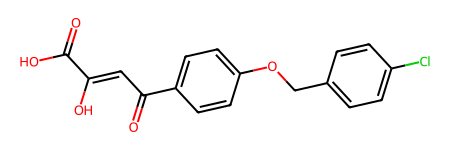

In [76]:
ms_inactive[1]

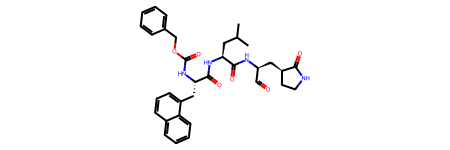

In [77]:
ms_active[1]

In [78]:
#generating new augmented smiles from existing ones 
mols_inactive = [[],[]]
augmented_smiles_inactive = [[],[]]
for i in range(len(ms_inactive)):
  mols_inactive.append([])
  augmented_smiles_inactive.append([])
  testsmi = ms_inactive[i]
  print('canon:',Chem.MolToSmiles(testsmi)) #prints original smile given in dataframe
  for j in range(4):
    smi = Chem.MolToSmiles(testsmi, doRandom=True) #converts rdkit mol object to smiles in random orientation 
    print(smi)
    augmented_smiles_inactive[i].append(smi) #creating list of augmented smiles in text 

    m = Chem.MolFromSmiles(smi)
    mols_inactive[i].append(m) #creating list of augmented smiles in rdkit mol object for visulization
  print('end', i)

  

canon: CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C
CCOC(=O)/C=C/[C@H](C[C@H]1C(=O)NCC1)NC(=O)[C@@H](NC([C@H](C(C)C)NC(c1noc(c1)C)=O)=O)Cc1ccccc1
O=C(c1noc(c1)C)N[C@H](C(=O)N[C@H](C(N[C@H](/C=C/C(=O)OCC)C[C@H]1C(=O)NCC1)=O)Cc1ccccc1)C(C)C
c1cccc(C[C@@H](C(N[C@H](/C=C/C(=O)OCC)C[C@H]2C(NCC2)=O)=O)NC([C@@H](NC(c2cc(on2)C)=O)C(C)C)=O)c1
c1c(C(N[C@@H](C(C)C)C(=O)N[C@H](C(N[C@H](/C=C/C(OCC)=O)C[C@@H]2CCNC2=O)=O)Cc2ccccc2)=O)noc1C
end 0
canon: O=C(O)/C(O)=C/C(=O)c1ccc(OCc2ccc(Cl)cc2)cc1
c1c(ccc(c1)Cl)COc1ccc(C(=O)/C=C(\O)C(O)=O)cc1
O/C(C(O)=O)=C\C(=O)c1ccc(cc1)OCc1ccc(cc1)Cl
c1cc(ccc1Cl)COc1ccc(C(/C=C(\O)C(=O)O)=O)cc1
c1c(OCc2ccc(cc2)Cl)ccc(c1)C(/C=C(/C(=O)O)O)=O
end 1
canon: COc1cc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(O)c(OC)c2)ccc1O
C(=C(/C=C/c1ccc(O)c(c1)OC)O)\C(=O)/C=C/c1cc(OC)c(cc1)O
O(C)c1cc(ccc1O)/C=C/C(=C/C(=O)/C=C/c1ccc(c(OC)c1)O)O
c1(/C=C/C(=O)/C=C(/C=C/c2ccc(c(c2)OC)O)O)cc(OC)c(cc1)O
c1(c(ccc(c1)/C=C/C(=C/C(/C=C/c1ccc(O)c(c1)OC)=O)O)O)OC
end 

In [79]:
#generating new augmented smiles from existing ones 
mols_active = [[],[]]
augmented_smiles_active = [[],[]]
for i in range(len(ms_active)):
  mols_active.append([])
  augmented_smiles_active.append([])
  testsmi = ms_active[i]
  print('canon:',Chem.MolToSmiles(testsmi)) #prints original smile given in dataframe
  for j in range(40):
    smi = Chem.MolToSmiles(testsmi, doRandom=True) #converts rdkit mol object to smiles in random orientation 
    print(smi)
    augmented_smiles_active[i].append(smi) #creating list of augmented smiles in text 

    m = Chem.MolFromSmiles(smi)
    mols_active[i].append(m) #creating list of augmented smiles in rdkit mol object for visulization
  print('end', i)


canon: CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cccc(Cl)c1
O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O
N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C
O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl
C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1
O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1
Clc1cc(S(=O)(N(C)CC(=O)NC2CCCC2)=O)ccc1
c1c(S(N(CC(=O)NC2CCCC2)C)(=O)=O)cccc1Cl
C1CCCC1NC(=O)CN(C)S(=O)(c1cc(Cl)ccc1)=O
O=S(=O)(c1cc(ccc1)Cl)N(CC(NC1CCCC1)=O)C
CN(S(=O)(=O)c1cccc(Cl)c1)CC(=O)NC1CCCC1
Clc1cc(ccc1)S(=O)(N(CC(=O)NC1CCCC1)C)=O
c1(cc(Cl)ccc1)S(N(CC(NC1CCCC1)=O)C)(=O)=O
C(C(=O)NC1CCCC1)N(S(c1cccc(c1)Cl)(=O)=O)C
CN(CC(=O)NC1CCCC1)S(=O)(=O)c1cc(Cl)ccc1
c1(S(=O)(N(C)CC(NC2CCCC2)=O)=O)cccc(Cl)c1
CN(S(=O)(=O)c1cc(ccc1)Cl)CC(NC1CCCC1)=O
C1CCC(C1)NC(=O)CN(C)S(c1cccc(Cl)c1)(=O)=O
C1CC(CC1)NC(CN(S(=O)(=O)c1cc(ccc1)Cl)C)=O
c1(Cl)cc(ccc1)S(N(C)CC(NC1CCCC1)=O)(=O)=O
c1(cccc(Cl)c1)S(=O)(=O)N(C)CC(=O)NC1CCCC1
N(C(CN(C)S(=O)(c1cccc(Cl)c1)=O)=O)C1CCCC1
N(CC(NC1CCCC1)=O)(S(=O)(c1cc(ccc1)Cl)=O)C
C1CC(NC(=O)CN(S(c2cc(Cl)ccc2)(=O)=O)C)CC1
N(CC(NC1C

We have created 5 augmented SMILES from each inactive compounds. Now 180*5 = 900.

From inactive ones, we created 50 from each. So, 18*50 = 900.

Now there is equal number of compounds for each classes.

In [80]:
len(mols_active), len(mols_active[0]), len(mols_inactive), len(mols_inactive[0])

(20, 40, 182, 4)

In [81]:
len(augmented_smiles_active), len(augmented_smiles_active[0]), len(augmented_smiles_inactive), len(augmented_smiles_inactive[0])

(20, 40, 182, 4)

In [82]:
augmented_smiles_active[15] 

['c1c(C(Oc2cc(cnc2)Cl)=O)occ1',
 'c1ncc(cc1Cl)OC(c1occc1)=O',
 'c1ncc(cc1OC(c1occc1)=O)Cl',
 'O=C(c1occc1)Oc1cncc(Cl)c1',
 'c1c(C(Oc2cc(cnc2)Cl)=O)occ1',
 'c1ncc(Cl)cc1OC(=O)c1ccco1',
 'c1ncc(OC(=O)c2ccco2)cc1Cl',
 'Clc1cncc(c1)OC(c1occc1)=O',
 'c1coc(c1)C(Oc1cc(Cl)cnc1)=O',
 'o1cccc1C(Oc1cncc(Cl)c1)=O',
 'c1c(occ1)C(=O)Oc1cncc(Cl)c1',
 'o1cccc1C(Oc1cncc(c1)Cl)=O',
 'C(Oc1cc(cnc1)Cl)(=O)c1occc1',
 'c1oc(cc1)C(=O)Oc1cc(Cl)cnc1',
 'o1cccc1C(=O)Oc1cc(Cl)cnc1',
 'O=C(c1occc1)Oc1cncc(Cl)c1',
 'O=C(Oc1cc(cnc1)Cl)c1occc1',
 'n1cc(Cl)cc(OC(c2occc2)=O)c1',
 'c1(cncc(OC(c2ccco2)=O)c1)Cl',
 'c1ncc(cc1Cl)OC(c1ccco1)=O',
 'O(C(c1ccco1)=O)c1cc(cnc1)Cl',
 'c1(C(=O)Oc2cc(cnc2)Cl)ccco1',
 'c1c(occ1)C(Oc1cncc(Cl)c1)=O',
 'c1coc(C(Oc2cc(cnc2)Cl)=O)c1',
 'c1(cncc(Cl)c1)OC(=O)c1occc1',
 'c1c(C(Oc2cc(cnc2)Cl)=O)occ1',
 'c1oc(cc1)C(Oc1cncc(Cl)c1)=O',
 'O(c1cc(Cl)cnc1)C(=O)c1occc1',
 'c1ncc(Cl)cc1OC(=O)c1ccco1',
 'c1c(occ1)C(=O)Oc1cc(Cl)cnc1',
 'c1ncc(cc1OC(=O)c1ccco1)Cl',
 'C(=O)(Oc1cncc(c1)Cl)c1ccco1',
 'O(

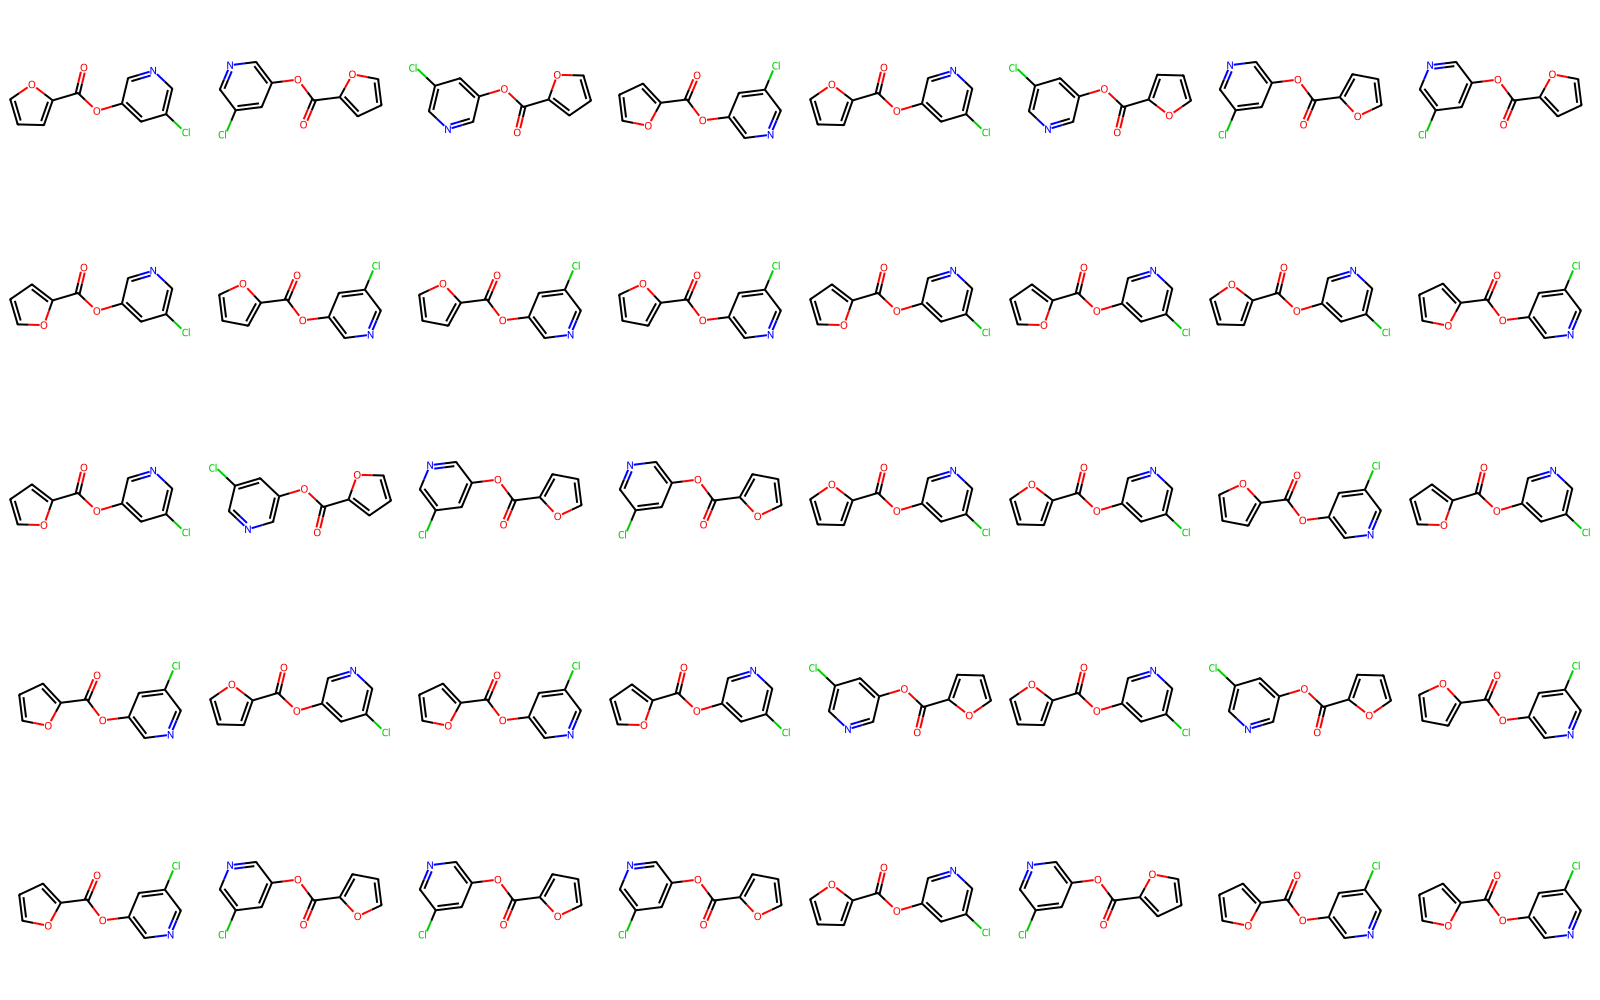

In [83]:
Draw.MolsToGridImage(mols_active[15], molsPerRow = 8) #visualizing smile augmentation 

In [84]:
augmented_smiles_inactive[150]

['S(CC(=O)Nc1ccc(Cl)cc1)c1nccc(-c2sc(-c3nn(C)c(C(F)(F)F)c3)cc2)n1',
 'c1c(-c2cc(C(F)(F)F)n(n2)C)sc(-c2ccnc(n2)SCC(=O)Nc2ccc(Cl)cc2)c1',
 'n1c(cc(C(F)(F)F)n1C)-c1ccc(s1)-c1nc(SCC(Nc2ccc(cc2)Cl)=O)ncc1',
 'N(c1ccc(cc1)Cl)C(CSc1nccc(n1)-c1sc(-c2nn(c(c2)C(F)(F)F)C)cc1)=O']

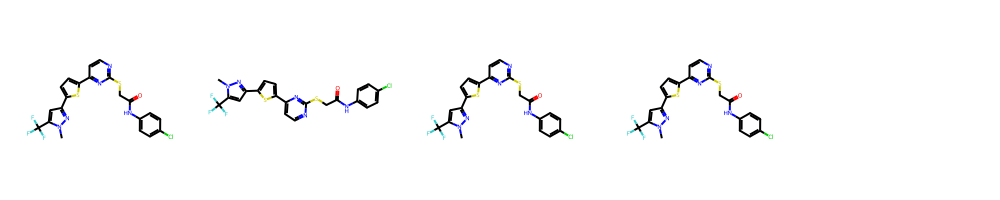

In [85]:
Draw.MolsToGridImage(mols_inactive[150], molsPerRow = 5) #visualizing smile augmentation 

In [86]:
df_aug_smiles_inactive = pd.DataFrame(columns = ['smiles', 'pIC50','bioactivity_class', 'MW', 'LogP','NumHDonors', 'NumHAcceptors' ]) #new dataframe for augmented smiles 

In [87]:
for i in range(180):
  for j in range(4):
    df_aug_smiles_inactive = df_aug_smiles_inactive.append({'smiles':augmented_smiles_inactive[i][j],'pIC50':inactive_smiles['pIC50'][i], 'bioactivity_class':inactive_smiles['bioactivity_class'][i], 'MW':inactive_smiles['MW'][i], 'LogP':inactive_smiles['LogP'][i], 'NumHDonors':inactive_smiles['NumHDonors'][i], 'NumHAcceptors':inactive_smiles['NumHAcceptors'][i]}, ignore_index=True) 




<ipython-input-87-ae1ac972bb3d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_smiles_inactive = df_aug_smiles_inactive.append({'smiles':augmented_smiles_inactive[i][j],'pIC50':inactive_smiles['pIC50'][i], 'bioactivity_class':inactive_smiles['bioactivity_class'][i], 'MW':inactive_smiles['MW'][i], 'LogP':inactive_smiles['LogP'][i], 'NumHDonors':inactive_smiles['NumHDonors'][i], 'NumHAcceptors':inactive_smiles['NumHAcceptors'][i]}, ignore_index=True)
<ipython-input-87-ae1ac972bb3d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_smiles_inactive = df_aug_smiles_inactive.append({'smiles':augmented_smiles_inactive[i][j],'pIC50':inactive_smiles['pIC50'][i], 'bioactivity_class':inactive_smiles['bioactivity_class'][i], 'MW':inactive_smiles['MW'][i], 'LogP':inactive_smiles['LogP'][i], 'NumHDonors':inact

In [88]:
df_aug_smiles_inactive # data size = 9900. different compounds 198. augmentation for each compound 50. so, 198*50 = 9900.

,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CCOC(=O)/C=C/[C@H](C[C@H]1C(=O)NCC1)NC(=O)[C@@...,3.522879,inactive,581.670,1.59522,4.0,8.0
1,O=C(c1noc(c1)C)N[C@H](C(=O)N[C@H](C(N[C@H](/C=...,3.522879,inactive,581.670,1.59522,4.0,8.0
2,c1cccc(C[C@@H](C(N[C@H](/C=C/C(=O)OCC)C[C@H]2C...,3.522879,inactive,581.670,1.59522,4.0,8.0
3,c1c(C(N[C@@H](C(C)C)C(=O)N[C@H](C(N[C@H](/C=C/...,3.522879,inactive,581.670,1.59522,4.0,8.0
4,c1c(ccc(c1)Cl)COc1ccc(C(=O)/C=C(\O)C(O)=O)cc1,4.301030,inactive,332.739,3.62820,2.0,4.0
...,...,...,...,...,...,...,...
715,c1c(ccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(cc1)[N+...,4.602060,inactive,308.271,2.33580,0.0,6.0
716,C(CC)CN1c2c(cc(I)cc2)C(=O)C1=O,4.180456,inactive,329.137,2.62060,0.0,2.0
717,C(C)CCN1c2ccc(cc2C(C1=O)=O)I,4.180456,inactive,329.137,2.62060,0.0,2.0
718,C(CCN1C(=O)C(=O)c2c1ccc(c2)I)C,4.180456,inactive,329.137,2.62060,0.0,2.0


In [89]:
df_aug_smiles_active = pd.DataFrame(columns = ['smiles', 'pIC50','bioactivity_class', 'MW', 'LogP','NumHDonors', 'NumHAcceptors' ]) #new dataframe for augmented smiles 

In [90]:
for i in range(18):
  for j in range(40):
    df_aug_smiles_active = df_aug_smiles_active.append({'smiles':augmented_smiles_active[i][j],'pIC50':active_smiles['pIC50'][i], 'bioactivity_class':active_smiles['bioactivity_class'][i], 'MW':active_smiles['MW'][i], 'LogP':active_smiles['LogP'][i], 'NumHDonors':active_smiles['NumHDonors'][i], 'NumHAcceptors':active_smiles['NumHAcceptors'][i]}, ignore_index=True) 




<ipython-input-90-a20dcb364978>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_smiles_active = df_aug_smiles_active.append({'smiles':augmented_smiles_active[i][j],'pIC50':active_smiles['pIC50'][i], 'bioactivity_class':active_smiles['bioactivity_class'][i], 'MW':active_smiles['MW'][i], 'LogP':active_smiles['LogP'][i], 'NumHDonors':active_smiles['NumHDonors'][i], 'NumHAcceptors':active_smiles['NumHAcceptors'][i]}, ignore_index=True)
<ipython-input-90-a20dcb364978>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aug_smiles_active = df_aug_smiles_active.append({'smiles':augmented_smiles_active[i][j],'pIC50':active_smiles['pIC50'][i], 'bioactivity_class':active_smiles['bioactivity_class'][i], 'MW':active_smiles['MW'][i], 'LogP':active_smiles['LogP'][i], 'NumHDonors':active_smiles['NumHDonors'][i], 'NumH

In [91]:
df_aug_smiles_active

,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O,6.026872,active,330.837,2.0193,1.0,3.0
1,N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C,6.026872,active,330.837,2.0193,1.0,3.0
2,O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl,6.026872,active,330.837,2.0193,1.0,3.0
3,C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1,6.026872,active,330.837,2.0193,1.0,3.0
4,O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1,6.026872,active,330.837,2.0193,1.0,3.0
...,...,...,...,...,...,...,...
715,Clc1cncc(c1)OC(c1ncsc1)=O,6.568636,active,240.671,2.4107,0.0,5.0
716,c1c(Cl)cncc1OC(=O)c1cscn1,6.568636,active,240.671,2.4107,0.0,5.0
717,n1cc(cc(OC(c2ncsc2)=O)c1)Cl,6.568636,active,240.671,2.4107,0.0,5.0
718,c1(cncc(c1)Cl)OC(=O)c1cscn1,6.568636,active,240.671,2.4107,0.0,5.0


In [92]:
df_aug_smiles = pd.concat([df_aug_smiles_active, df_aug_smiles_inactive])

In [93]:
df_aug_smiles = df_aug_smiles.reset_index(drop=True)
df_aug_smiles

,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O,6.026872,active,330.837,2.0193,1.0,3.0
1,N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C,6.026872,active,330.837,2.0193,1.0,3.0
2,O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl,6.026872,active,330.837,2.0193,1.0,3.0
3,C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1,6.026872,active,330.837,2.0193,1.0,3.0
4,O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1,6.026872,active,330.837,2.0193,1.0,3.0
...,...,...,...,...,...,...,...
1435,c1c(ccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(cc1)[N+...,4.602060,inactive,308.271,2.3358,0.0,6.0
1436,C(CC)CN1c2c(cc(I)cc2)C(=O)C1=O,4.180456,inactive,329.137,2.6206,0.0,2.0
1437,C(C)CCN1c2ccc(cc2C(C1=O)=O)I,4.180456,inactive,329.137,2.6206,0.0,2.0
1438,C(CCN1C(=O)C(=O)c2c1ccc(c2)I)C,4.180456,inactive,329.137,2.6206,0.0,2.0


In [94]:
len(df_aug_smiles['smiles'].unique())

1421

In [95]:
df_aug_smiles = df_aug_smiles.drop_duplicates(['smiles'])
df_aug_smiles = df_aug_smiles.reset_index(drop=True)
df_aug_smiles

,smiles,pIC50,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O,6.026872,active,330.837,2.0193,1.0,3.0
1,N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C,6.026872,active,330.837,2.0193,1.0,3.0
2,O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl,6.026872,active,330.837,2.0193,1.0,3.0
3,C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1,6.026872,active,330.837,2.0193,1.0,3.0
4,O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1,6.026872,active,330.837,2.0193,1.0,3.0
...,...,...,...,...,...,...,...
1416,c1c(ccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(cc1)[N+...,4.602060,inactive,308.271,2.3358,0.0,6.0
1417,C(CC)CN1c2c(cc(I)cc2)C(=O)C1=O,4.180456,inactive,329.137,2.6206,0.0,2.0
1418,C(C)CCN1c2ccc(cc2C(C1=O)=O)I,4.180456,inactive,329.137,2.6206,0.0,2.0
1419,C(CCN1C(=O)C(=O)c2c1ccc(c2)I)C,4.180456,inactive,329.137,2.6206,0.0,2.0


<Axes: ylabel='bioactivity_class'>

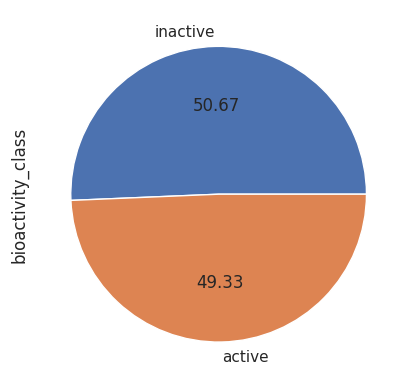

In [96]:
df_aug_smiles['bioactivity_class'].value_counts().plot.pie(autopct='%.2f')

### Export

In [ ]:
df_aug_smiles.to_csv('covid_df_augmented_smiles.csv', index=False)

In [ ]:
cp covid_df_augmented_smiles.csv '/content/gdrive/MyDrive/CSE498R/Results/' 

## EDA of Augmented Data

In [ ]:
def mannwhitney_aug(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_aug_smiles[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_aug_smiles[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

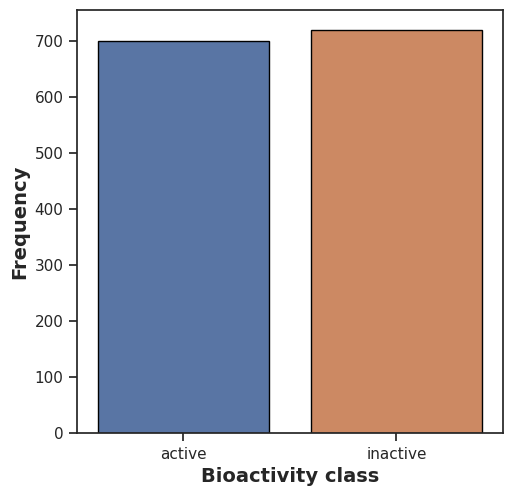

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_aug_smiles, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class_augmented_smiles.pdf')

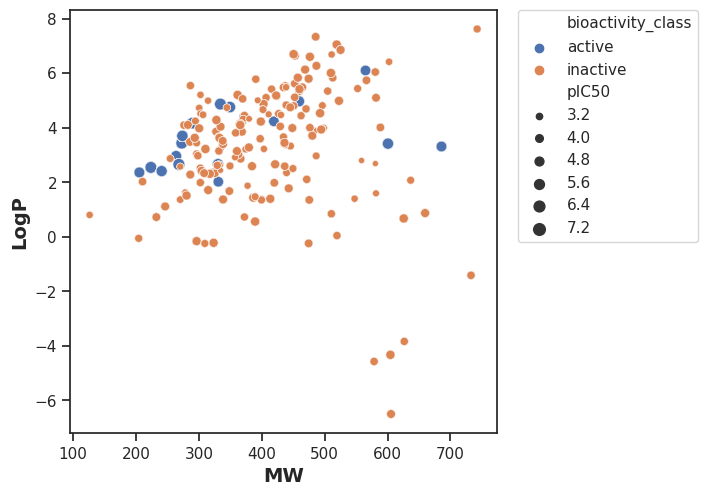

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_aug_smiles, hue='bioactivity_class', size='pIC50', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP_augmented_smiles_augmented_smiles.pdf')

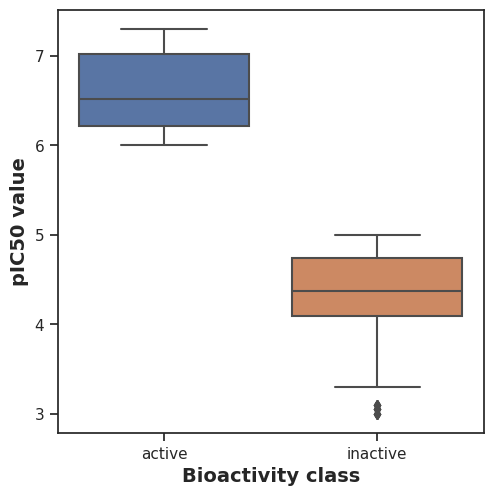

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_aug_smiles)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50_augmented_smiles.pdf')

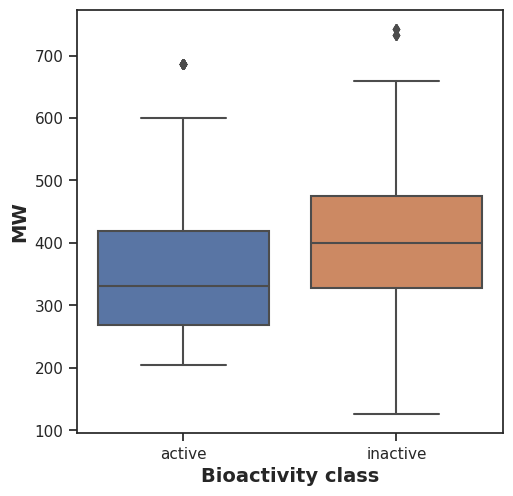

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_aug_smiles)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW_augmented_smiles.pdf')

In [ ]:
mannwhitney_aug('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,172008.0,2.701342e-25,0.05,Different distribution (reject H0)


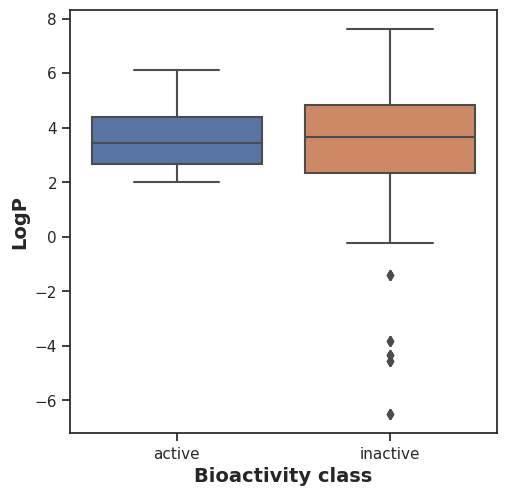

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_aug_smiles)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP_augmented_smiles.pdf')

In [ ]:
mannwhitney_aug('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,252952.0,0.939023,0.05,Same distribution (fail to reject H0)


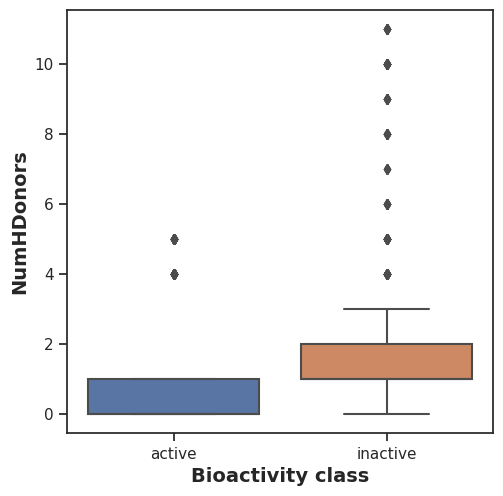

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_aug_smiles)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors_augmented_smiles.pdf')

In [ ]:
mannwhitney_aug('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,123828.0,1.320040e-68,0.05,Different distribution (reject H0)


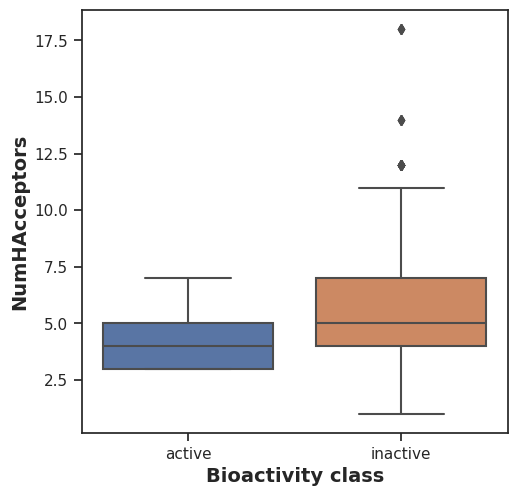

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_aug_smiles)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors_augmented_smiles.pdf')

In [ ]:
mannwhitney_aug('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,171198.0,6.352366e-27,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: gdrive/MyDrive/Classroom/Study Session https:  meet.google.com uwd-abfa-cpa
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: plot_ic50.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: covid_df_four_properties.csv (deflated 77%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: mannwhitneyu_MW.csv (deflated 7%)
updating: plot_MW.pdf (deflated 38%)
updating: plot_MW_vs_LogP.pdf (deflated 11%)
updating: covid_df_2_classes.csv (deflated 72%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_LogP_augmented_smiles.pdf (deflated 38%)
  adding: plot_bioactivity_class_augmented_smiles.pdf (deflated 38%)
  adding: plot_NumHAcceptors_augmented_smiles.pdf (deflated 38%)
  adding: plot_MW_augmented_smiles.pdf (deflated 39%)
  adding: covid_df_augmented_smiles.csv (d

In [ ]:
cp results.zip '/content/gdrive/MyDrive/CSE498R/Results/' 

The statistical properties of both classes remain same. Mann-Whitney U Test results is also identical to original dataset. 

---
**Therefore, dataset has been scaled but properties remain intact.**


---



